# Sub-Saharan Africa

The code of the DIANA algorithm is from Github and changed to fit this data. 

## Dataframe Gender

In [2]:
!pip install scikit-learn-extra

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

In [4]:
df = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [5]:
df = df.iloc[54000:,]
df.drop(columns=df.iloc[:,3:54].columns.tolist(), inplace=True)
df.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df.rename({'Country Name':'Country'},inplace=True,axis=1)
df = df.loc[df.Indicator.str.contains('1=yes; 0=no')]
df = df.assign(Mean_GV=df.mean(axis=1, numeric_only=True))
df.drop(columns=df.iloc[:,3:16].columns.tolist(), inplace=True)
del df['Country Code']
df = pd.pivot(df, index=['Country'], columns = 'Indicator',values = 'Mean_GV')

In [6]:
importances = np.array([0.01831044, 0.03237455, 0.0031967 , 0.012108  , 0.01552896,
       0.00758614, 0.00181886, 0.0546642 , 0.01587967, 0.01247531,
       0.02007783, 0.0364012 , 0.03424009, 0.03465867, 0.02593966,
       0.01570586, 0.05781482, 0.01149065, 0.00752398, 0.05290953,
       0.07132007, 0.01305223, 0.03959353, 0.04099451, 0.02862905,
       0.00649011, 0.00942123, 0.00436768, 0.03333931, 0.02942839,
       0.02490152, 0.02989014, 0.0245622 , 0.05561928, 0.11768564])

In [10]:
df.iloc[:,] *= importances
df = df.assign(Gender_Var=df.sum(axis=1, numeric_only=True))
df.dropna(axis=0, inplace = True)
df.drop(columns=df.iloc[:,0:35].columns.tolist(), inplace=True)

## Dataframe Gini

In [11]:
df1 = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [12]:
df1 = df1.iloc[54000:,]
df1.drop(columns=df1.iloc[:,3:54].columns.tolist(), inplace=True)
df1.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df1.rename({'Country Name':'Country'},inplace=True,axis=1)
df1 = df1.loc[df1.Indicator.str.contains('Gini index')]
df1 = df1.assign(Gini_Var=df1.mean(axis=1, numeric_only=True))
df1.drop(columns=df1.iloc[:,1:16].columns.tolist(), inplace=True)
df1.dropna(axis=0, inplace = True)

## Dataframe Growth

In [13]:
df2 = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [14]:
df2 = df2.iloc[54000:,]
df2.drop(columns=df2.iloc[:,3:54].columns.tolist(), inplace=True)
df2.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df2.rename({'Country Name':'Country'},inplace=True,axis=1)
df2 = df2.loc[df2.Indicator.str.contains('GDP growth')]
df2 = df2.assign(Growth_Var=df2.mean(axis=1, numeric_only=True))
df2.drop(columns=df2.iloc[:,1:16].columns.tolist(), inplace=True)
df2.dropna(axis=0, inplace = True)

## Dataframe continents

In [15]:
df_Continent = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Country')

In [16]:
print(df_Continent['Region'].unique())

['Latin America & Caribbean' nan 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [17]:
df_Continent = df_Continent[['Table Name', 'Region']]
df_Continent.rename({'Table Name':'Country'},inplace=True,axis=1)
df_Continent.dropna(axis=0, inplace = True)

## Dataframe Gender-Growth

In [ ]:
df_Gender_Growth = df.merge(df2,how='inner',left_on='Country', right_on='Country')
df_Gender_Growth = df_Gender_Growth.merge(df_Continent, how='inner',left_on='Country', right_on='Country')
df_Gender_Growth.head()

,Country,Gender_Var,Growth_Var,Region
0,Afghanistan,0.187844,2.019799,South Asia
1,Albania,0.750623,2.576940,Europe & Central Asia
2,Algeria,0.470927,2.108333,Middle East & North Africa
3,Angola,0.559647,1.527807,Sub-Saharan Africa
4,Antigua and Barbuda,0.473140,0.504912,Latin America & Caribbean


In [ ]:
print(df_Gender_Growth['Gender_Var'].min())
print(df_Gender_Growth['Gender_Var'].max())
print(df_Gender_Growth['Growth_Var'].min())
print(df_Gender_Growth['Growth_Var'].max())

0.12346439000000001
0.9945660646153848
-6.586501287378742
9.123634327274731


## Dataframe Gini-Growth

In [22]:
df_Gini_Growth = df1.merge(df2,how='inner',left_on='Country', right_on='Country')
df_Gini_Growth = df_Gini_Growth.merge(df_Continent, how='inner',left_on='Country', right_on='Country')
df_Gini_Growth.head()

,Country,Gini_Var,Growth_Var,Region
0,Albania,32.014286,2.576940,Europe & Central Asia
1,Algeria,27.600000,2.108333,Middle East & North Africa
2,Angola,51.300000,1.527807,Sub-Saharan Africa
3,Argentina,41.960000,1.191811,Latin America & Caribbean
4,Armenia,30.827273,3.600000,Europe & Central Asia


In [23]:
print(df_Gini_Growth['Gini_Var'].min())
print(df_Gini_Growth['Gini_Var'].max())
print(df_Gini_Growth['Growth_Var'].min())
print(df_Gini_Growth['Growth_Var'].max())

25.07
63.2
-6.586501287378742
9.123634327274731


## Filter on Sub-Saharan Africa

In [24]:
df_Gender_Growth_SSA = df_Gender_Growth.loc[df_Gender_Growth['Region'] == 'Sub-Saharan Africa']
df_Gini_Growth_SSA = df_Gini_Growth.loc[df_Gini_Growth['Region'] == 'Sub-Saharan Africa']

In [26]:
df_Gender_Growth_SSA.shape

(46, 4)

In [27]:
df_Gini_Growth_SSA.shape

(43, 4)

In [34]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

## Gender-Growth Variable

### K-means clustering

In [66]:
df_Gender_Growth_SSA_K = df_Gender_Growth_SSA[['Gender_Var', 'Growth_Var']]

In [67]:
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gender_Growth_SSA_K)
    sse_.append([k, silhouette_score(df_Gender_Growth_SSA_K, kmeans.labels_)])
sse_

[[2, 0.6452399333414259],
 [3, 0.5352917920844181],
 [4, 0.47567469054412354],
 [5, 0.5022424885038018],
 [6, 0.5108074130357927],
 [7, 0.5106909763352413],
 [8, 0.49784209806748303],
 [9, 0.4825392894838589]]

In [68]:
DB_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gender_Growth_SSA_K)
    DB_.append([k, davies_bouldin_score(df_Gender_Growth_SSA_K, kmeans.labels_)])
DB_

[[2, 0.5522490081233327],
 [3, 0.561333242184631],
 [4, 0.5699766588987352],
 [5, 0.47559443026720094],
 [6, 0.3856102554588064],
 [7, 0.32330732681702135],
 [8, 0.3598424984376295],
 [9, 0.40123197647474845]]

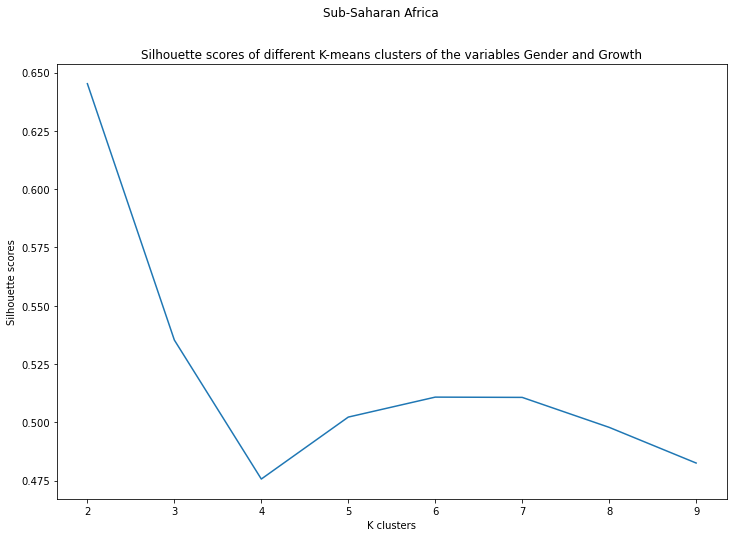

In [69]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-means clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [70]:
model_clus1 = KMeans(n_clusters = 3, random_state = 42)
model_clus1.fit(df_Gender_Growth_SSA_K)
data1 = df_Gender_Growth_SSA_K
data1.index = pd.RangeIndex(len(data1.index))
df_Gender_Growth_SSA_K = pd.concat([data1, pd.Series(model_clus1.labels_)], axis = 1)
df_Gender_Growth_SSA_K.columns = ['Gender_Var', 'Growth_Var', 'ClusterID_K']
df_Gender_Growth_SSA_K['ClusterID_K'].value_counts()

1    23
0    18
2     5
Name: ClusterID_K, dtype: int64

In [71]:
df_Gender_Growth_SSA = pd.merge(df_Gender_Growth_SSA,  df_Gender_Growth_SSA_K, how = 'inner', left_on=['Gender_Var', 'Growth_Var'], right_on=['Gender_Var', 'Growth_Var'])

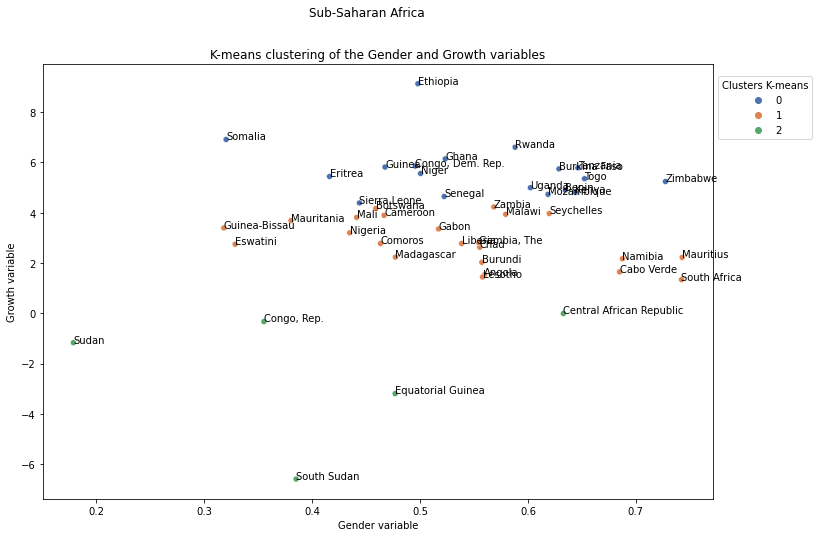

In [72]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_K', legend = 'full', palette="deep", data = df_Gender_Growth_SSA)
plt.title('K-means clustering of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_SSA.Gender_Var, df_Gender_Growth_SSA.Growth_Var, df_Gender_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters K-means', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [73]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_SSA.groupby(['ClusterID_K']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_SSA.groupby(['ClusterID_K']).Growth_Var.mean())
dt_SSA_knn_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_SSA_knn_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_K,,
0,0.551714,5.664647
1,0.532008,2.865749
2,0.405857,-2.257392


### K-medoids clustering

In [74]:
df_Gender_Growth_SSA_KM = df_Gender_Growth_SSA[['Gender_Var', 'Growth_Var']]

In [75]:
sse_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, method = 'pam', random_state = 42).fit(df_Gender_Growth_SSA_KM)
    sse_.append([k, silhouette_score(df_Gender_Growth_SSA_KM, kmedoids.labels_)])
sse_

[[2, 0.5116792152349052],
 [3, 0.3936368718677973],
 [4, 0.48022900033167004],
 [5, 0.4443329627824129],
 [6, 0.45076769405296746],
 [7, 0.4645405569692146],
 [8, 0.44536158663348757],
 [9, 0.45704796866580444]]

In [76]:
DB_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, random_state = 42).fit(df_Gender_Growth_SSA_KM)
    DB_.append([k, davies_bouldin_score(df_Gender_Growth_SSA_KM, kmedoids.labels_)])
DB_

[[2, 0.6712879793332721],
 [3, 0.6705539091128307],
 [4, 0.7108315549597568],
 [5, 0.6037849494186437],
 [6, 0.5983560042657943],
 [7, 0.6373213490877507],
 [8, 0.6316719363437492],
 [9, 0.5630845251633422]]

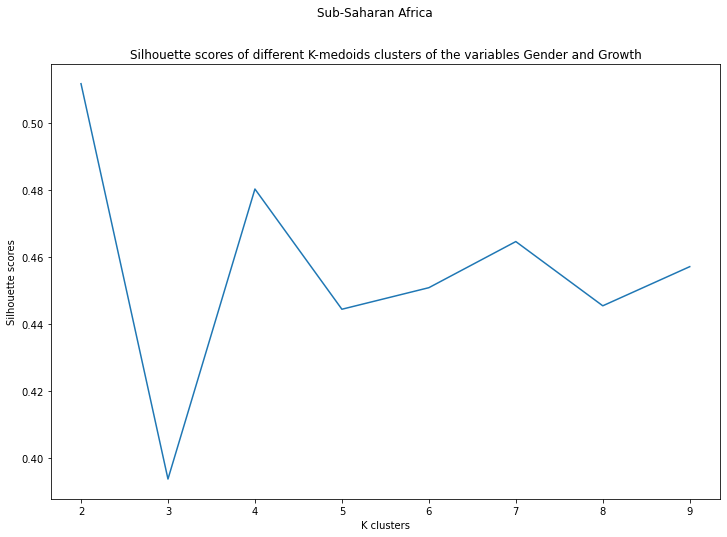

In [77]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-medoids clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [78]:
model_clus2 = KMedoids(n_clusters = 4, random_state = 42, method = 'pam')
model_clus2.fit(df_Gender_Growth_SSA_KM)
data2 = df_Gender_Growth_SSA_KM
data2.index = pd.RangeIndex(len(data2.index))
df_Gender_Growth_SSA_KM = pd.concat([data2, pd.Series(model_clus2.labels_)], axis = 1)
df_Gender_Growth_SSA_KM.columns = ['Gender_Var', 'Growth_Var', 'ClusterID_KM']
df_Gender_Growth_SSA_KM['ClusterID_KM'].value_counts()

1    14
0    14
2    13
3     5
Name: ClusterID_KM, dtype: int64

In [79]:
df_Gender_Growth_SSA = pd.merge(df_Gender_Growth_SSA, df_Gender_Growth_SSA_KM, how = 'inner', left_on=['Gender_Var', 'Growth_Var'], right_on=['Gender_Var', 'Growth_Var'])

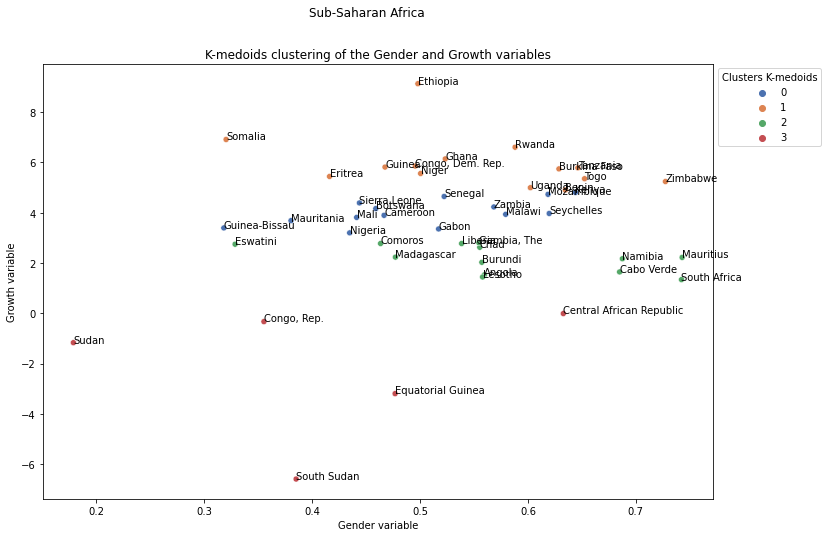

In [80]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_KM', legend = 'full', palette="deep", data = df_Gender_Growth_SSA)
plt.title('K-medoids clustering of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_SSA.Gender_Var, df_Gender_Growth_SSA.Growth_Var, df_Gender_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters K-medoids', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [81]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_SSA_KM.groupby(['ClusterID_KM']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_SSA_KM.groupby(['ClusterID_KM']).Growth_Var.mean())
dt_SSA_km_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_SSA_km_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_KM,,
0,0.501036,4.011503
1,0.550135,5.957762
2,0.573125,2.177398
3,0.405857,-2.257392


### AGNES clustering

In [82]:
df_Gender_Growth_SSA_A = df_Gender_Growth_SSA[['Gender_Var', 'Growth_Var']]

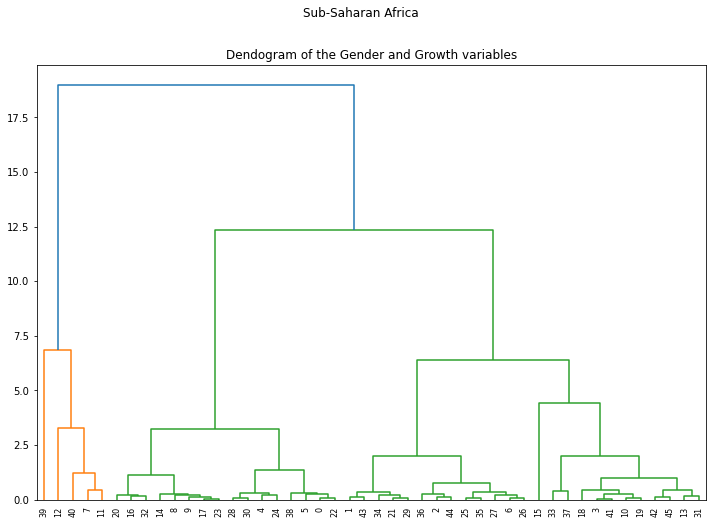

In [83]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
dend = shc.dendrogram(shc.linkage(df_Gender_Growth_SSA_A, method = 'ward'))

In [84]:
sse_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gender_Growth_SSA_A)
    silhouette_average = silhouette_score(df_Gender_Growth_SSA_A, cluster_labels)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.6452399333414259],
 [3, 0.5209476298021135],
 [4, 0.5237794552386571],
 [5, 0.48765420720456515],
 [6, 0.5065003488181327],
 [7, 0.5015586398918465],
 [8, 0.49784209806748303],
 [9, 0.4778987657900085]]

In [85]:
DB_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gender_Growth_SSA_A)
    davies_bouldin = davies_bouldin_score(df_Gender_Growth_SSA_A, cluster_labels)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5522490081233327],
 [3, 0.5655601207283611],
 [4, 0.4337432978012665],
 [5, 0.48289486085061056],
 [6, 0.39038776325110747],
 [7, 0.32859318291103906],
 [8, 0.3598424984376295],
 [9, 0.3661145056468711]]

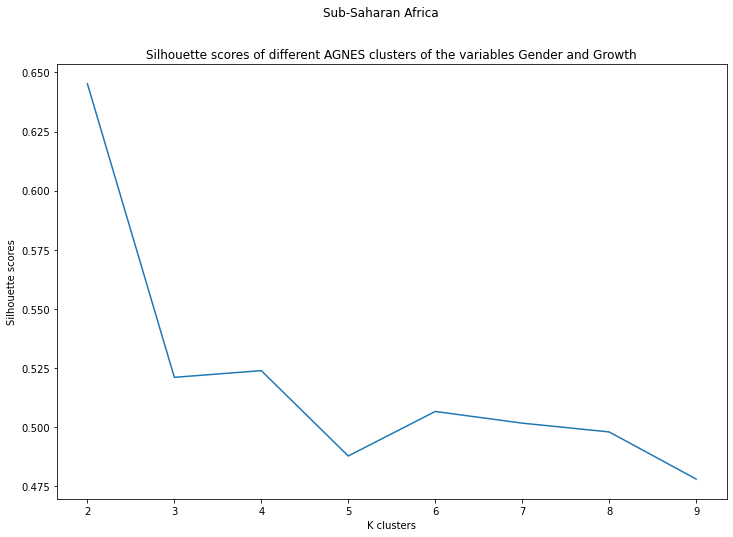

In [86]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different AGNES clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [87]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean' ,linkage = 'ward')
ClusterID_A = cluster.fit_predict(df_Gender_Growth_SSA_A)
ClusterID_A

array([2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0,
       0, 0])

In [88]:
df_Gender_Growth_SSA['ClusterID_A'] = [2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0,
       0, 0]

In [89]:
df_Gender_Growth_SSA['ClusterID_A'].value_counts()

0    25
2    16
1     4
3     1
Name: ClusterID_A, dtype: int64

In [90]:
df_Gender_Growth_SSA.head()

,Country,Gender_Var,Growth_Var,Region,ClusterID_K,ClusterID_KM,ClusterID_A
0,Angola,0.559647,1.527807,Sub-Saharan Africa,1,2,2
1,Benin,0.634683,4.899561,Sub-Saharan Africa,0,1,0
2,Botswana,0.459069,4.159963,Sub-Saharan Africa,1,0,0
3,Burkina Faso,0.628744,5.737749,Sub-Saharan Africa,0,1,0
4,Burundi,0.557315,2.026105,Sub-Saharan Africa,1,2,2


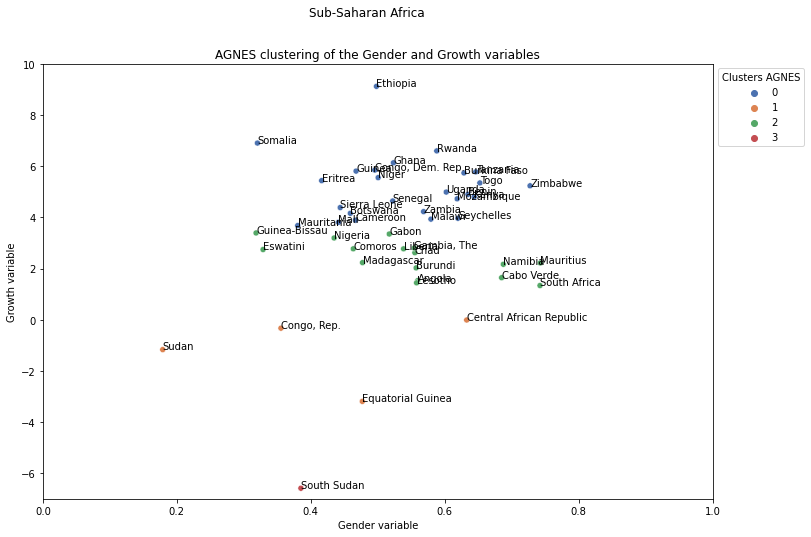

In [91]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_A', legend = 'full', palette="deep", data = df_Gender_Growth_SSA)
plt.title('AGNES clustering of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_SSA.Gender_Var, df_Gender_Growth_SSA.Growth_Var, df_Gender_Growth_SSA.Country, plt.gca()) 
plt.xlim([0,1])
plt.ylim([-7,10])
plt.legend(title='Clusters AGNES', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [92]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_SSA.groupby(['ClusterID_A']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_SSA.groupby(['ClusterID_A']).Growth_Var.mean())
dt_SSA_A_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_SSA_A_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_A,,
0,0.537841,5.185233
1,0.411011,-1.175114
2,0.545062,2.390316
3,0.385241,-6.586501


### DIANA clustering

In [93]:
df_Gender_Growth_SSA_D = df_Gender_Growth_SSA[['Gender_Var', 'Growth_Var']]

In [94]:
from scipy.spatial import distance_matrix

def DIANA(data, n_clusters):
    n_samples = len(data)
    n_features = 2
    similarity_matrix = distance_matrix(data.values, data.values) # similarity matrix of the data
    clusters = [list(range(n_samples))]      # list of clusters, initially the whole dataset is a single cluster
    while True:
        c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
        max_cluster_dia = np.argmax(c_diameters)  #maximum cluster diameter
        max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
        splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
        last_clusters = clusters[max_cluster_dia]
        del last_clusters[max_difference_index]
        while True:
            split = False
            for j in range(len(last_clusters))[::-1]:
                splinter_distances = similarity_matrix[last_clusters[j], splinters]
                last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
                if np.mean(splinter_distances) <= np.mean(last_distances):
                    splinters.append(last_clusters[j])
                    del last_clusters[j]
                    split = True
                    break
            if split == False:
                break
        del clusters[max_cluster_dia]
        clusters.append(splinters)
        clusters.append(last_clusters)
        if len(clusters) == n_clusters:
            break

    cluster_labels = np.zeros(n_samples)
    for i in range(len(clusters)):
        cluster_labels[clusters[i]] = i

    return cluster_labels

In [95]:
sse_ = []
for k in range (2,10):
    clustering = DIANA(df_Gender_Growth_SSA_D, k)
    silhouette_average = silhouette_score(df_Gender_Growth_SSA_D, clustering)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.6452399333414259],
 [3, 0.5352917920844181],
 [4, 0.5269343188257235],
 [5, 0.5136149685752479],
 [6, 0.49384208576987554],
 [7, 0.4881891411863334],
 [8, 0.4750835956854507],
 [9, 0.49407282512282363]]

In [96]:
DB_ = []
for k in range (2,10):
    clustering = DIANA(df_Gender_Growth_SSA_D, k)
    davies_bouldin = davies_bouldin_score(df_Gender_Growth_SSA_D, clustering)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5522490081233327],
 [3, 0.561333242184631],
 [4, 0.4398412690346257],
 [5, 0.3724392644290023],
 [6, 0.30651618517374946],
 [7, 0.32582182026808415],
 [8, 0.3514930530948424],
 [9, 0.33917496326872265]]

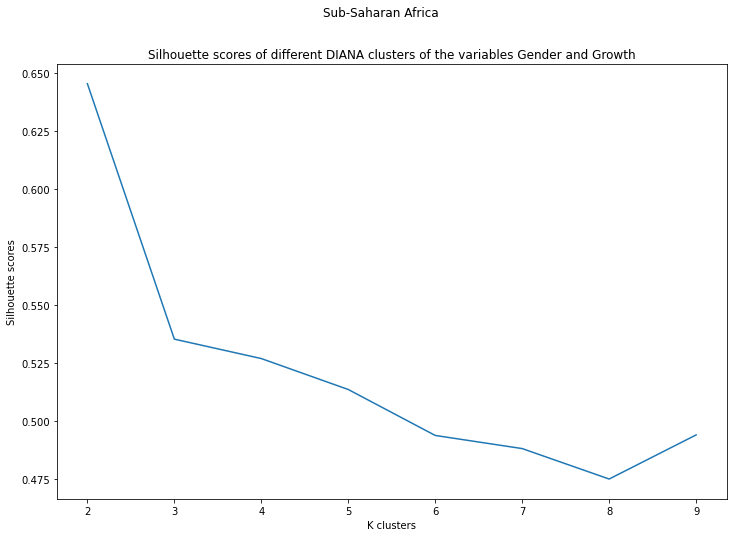

In [97]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different DIANA clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [98]:
DIANA(df_Gender_Growth_SSA_D, 3)

array([2., 1., 2., 1., 2., 2., 2., 0., 2., 2., 1., 0., 0., 1., 2., 1., 2.,
       2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 2., 0., 0., 1., 1., 1., 2., 1.])

In [99]:
df_Gender_Growth_SSA['ClusterID_D'] = [round(float(i)) for i in [2., 1., 2., 1., 2., 2., 2., 0., 2., 2., 1., 0., 0., 1., 2., 1., 2.,
       2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 2., 0., 0., 1., 1., 1., 2., 1.]]

In [100]:
df_Gender_Growth_SSA['ClusterID_D'].value_counts()

2    23
1    18
0     5
Name: ClusterID_D, dtype: int64

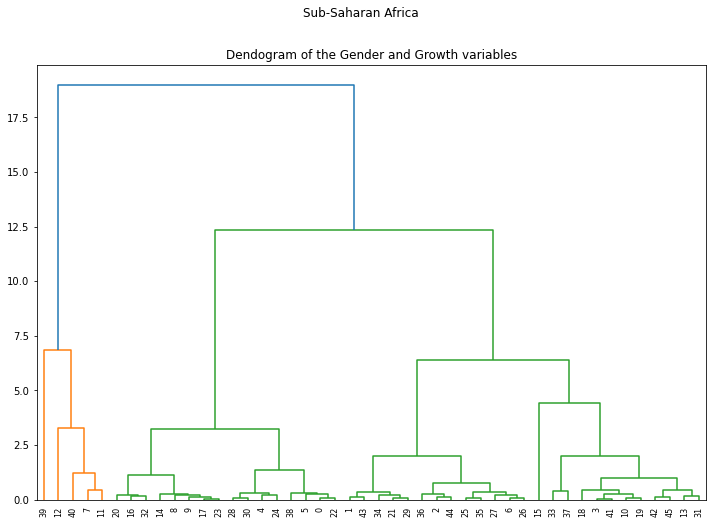

In [101]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
dend = shc.dendrogram(shc.linkage(df_Gender_Growth_SSA_D, method = 'ward'))

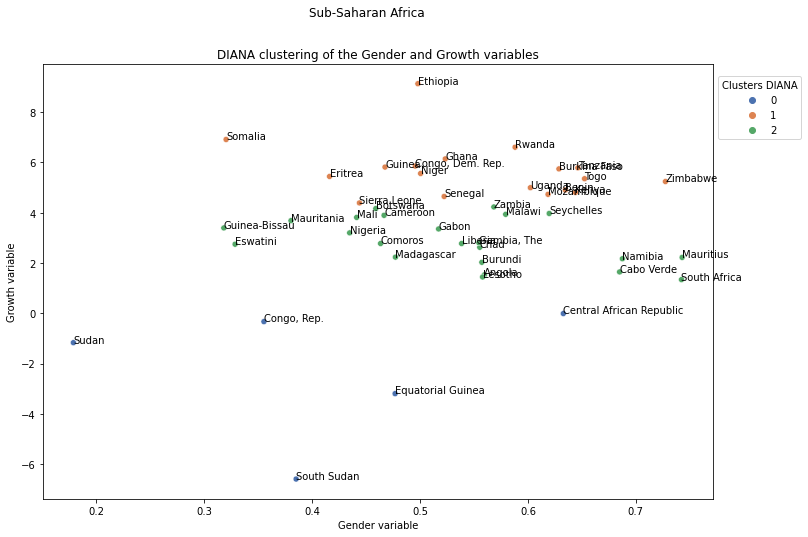

In [102]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_D', legend = 'full', palette="deep", data = df_Gender_Growth_SSA)
plt.title('DIANA clustering of the Gender and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_SSA.Gender_Var, df_Gender_Growth_SSA.Growth_Var, df_Gender_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters DIANA', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

## Growth-Gini Variable

### K-means clustering

In [104]:
df_Gini_Growth_SSA_K = df_Gini_Growth_SSA[['Growth_Var', 'Gini_Var']]

In [105]:
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gini_Growth_SSA_K)
    sse_.append([k, silhouette_score(df_Gini_Growth_SSA_K, kmeans.labels_)])
sse_

[[2, 0.5935536824699698],
 [3, 0.4511113417752282],
 [4, 0.4622668609468155],
 [5, 0.45215356191028544],
 [6, 0.37577343095602805],
 [7, 0.35864331020536133],
 [8, 0.3736257082412392],
 [9, 0.3489605012122538]]

In [106]:
DB_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gini_Growth_SSA_K)
    DB_.append([k, davies_bouldin_score(df_Gini_Growth_SSA_K, kmeans.labels_)])
DB_

[[2, 0.5247746702397869],
 [3, 0.7059283729572222],
 [4, 0.7064630536633167],
 [5, 0.5639614520513475],
 [6, 0.7229007827163051],
 [7, 0.7073039426704825],
 [8, 0.5507744315510291],
 [9, 0.7288021014205993]]

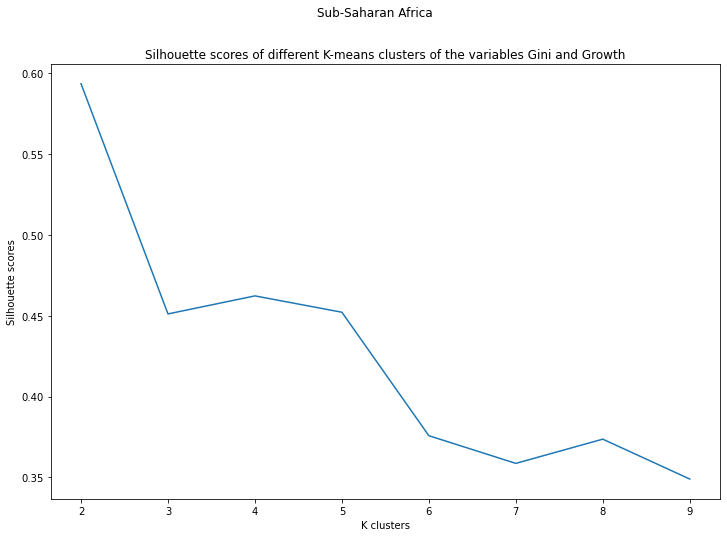

In [107]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-means clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [108]:
model_clus1 = KMeans(n_clusters = 4, random_state = 42)
model_clus1.fit(df_Gini_Growth_SSA_K)
data1 = df_Gini_Growth_SSA_K
data1.index = pd.RangeIndex(len(data1.index))
df_Gini_Growth_SSA_K = pd.concat([data1, pd.Series(model_clus1.labels_)], axis = 1)
df_Gini_Growth_SSA_K.columns = ['Growth_Var', 'Gini_Var', 'ClusterID_K']
df_Gini_Growth_SSA_K['ClusterID_K'].value_counts()

1    21
2    13
0     7
3     2
Name: ClusterID_K, dtype: int64

In [109]:
df_Gini_Growth_SSA = pd.merge(df_Gini_Growth_SSA,  df_Gini_Growth_SSA_K, how = 'inner', left_on=['Growth_Var', 'Gini_Var'], right_on=['Growth_Var', 'Gini_Var'])

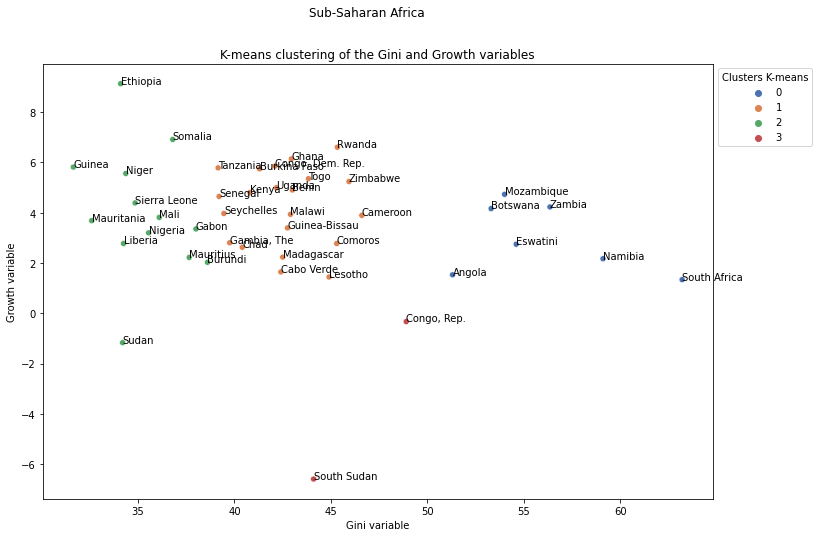

In [110]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_K', legend = 'full', palette="deep", data = df_Gini_Growth_SSA)
plt.title('K-means clustering of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_SSA.Gini_Var, df_Gini_Growth_SSA.Growth_Var, df_Gini_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters K-means', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [111]:
Cluster_Growth = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_K']).Growth_Var.mean())
Cluster_Gini = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_K']).Gini_Var.mean())
dt_SSA_knn_Growth_Gini = pd.concat([Cluster_Growth, Cluster_Gini], axis = 1)
dt_SSA_knn_Growth_Gini

,Growth_Var,Gini_Var
ClusterID_K,,
0,2.984137,55.978571
1,4.224465,42.510317
2,3.974488,35.285897
3,-3.458223,46.500000


### K-medoids clustering

In [112]:
df_Gini_Growth_SSA_KM = df_Gini_Growth_SSA[['Growth_Var', 'Gini_Var']]

In [113]:
sse_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, method = 'pam', random_state = 42).fit(df_Gini_Growth_SSA_KM)
    sse_.append([k, silhouette_score(df_Gini_Growth_SSA_KM, kmedoids.labels_)])
sse_

[[2, 0.5935536824699698],
 [3, 0.4476497805052815],
 [4, 0.34607296449277125],
 [5, 0.35595982719933683],
 [6, 0.34895852021292934],
 [7, 0.34621588136697046],
 [8, 0.3480403030440777],
 [9, 0.33188495746714314]]

In [114]:
DB_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, random_state = 42).fit(df_Gini_Growth_SSA_KM)
    DB_.append([k, davies_bouldin_score(df_Gini_Growth_SSA_KM, kmedoids.labels_)])
DB_

[[2, 0.8305462778693059],
 [3, 0.7148814959402611],
 [4, 0.853253533386996],
 [5, 0.8172803392491051],
 [6, 0.8078966181828303],
 [7, 0.8281062669915722],
 [8, 0.8473997596031702],
 [9, 0.8751397703237894]]

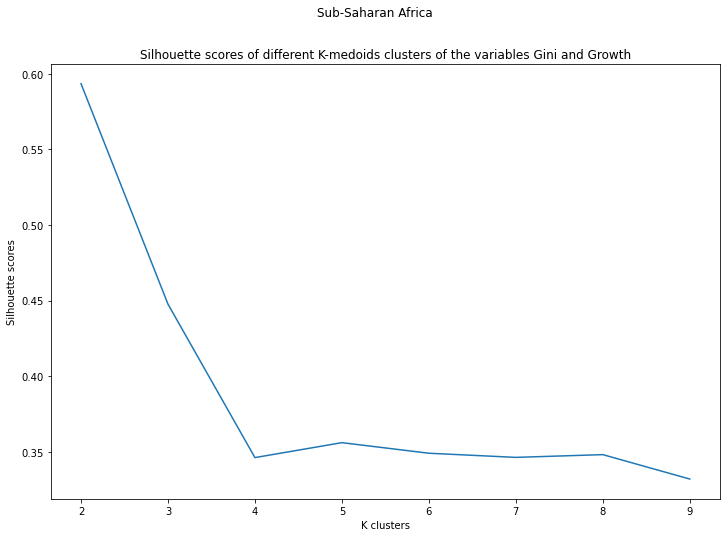

In [115]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-medoids clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [116]:
model_clus2 = KMedoids(n_clusters = 3, random_state = 42, method = 'pam')
model_clus2.fit(df_Gini_Growth_SSA_KM)
data2 = df_Gini_Growth_SSA_KM
data2.index = pd.RangeIndex(len(data2.index))
df_Gini_Growth_SSA_KM = pd.concat([data2, pd.Series(model_clus2.labels_)], axis = 1)
df_Gini_Growth_SSA_KM.columns = ['Growth_Var', 'Gini_Var', 'ClusterID_KM']
df_Gini_Growth_SSA_KM['ClusterID_KM'].value_counts()

1    19
2    16
0     8
Name: ClusterID_KM, dtype: int64

In [117]:
df_Gini_Growth_SSA = pd.merge(df_Gini_Growth_SSA, df_Gini_Growth_SSA_KM, how = 'inner', left_on=['Growth_Var', 'Gini_Var'], right_on=['Growth_Var', 'Gini_Var'])

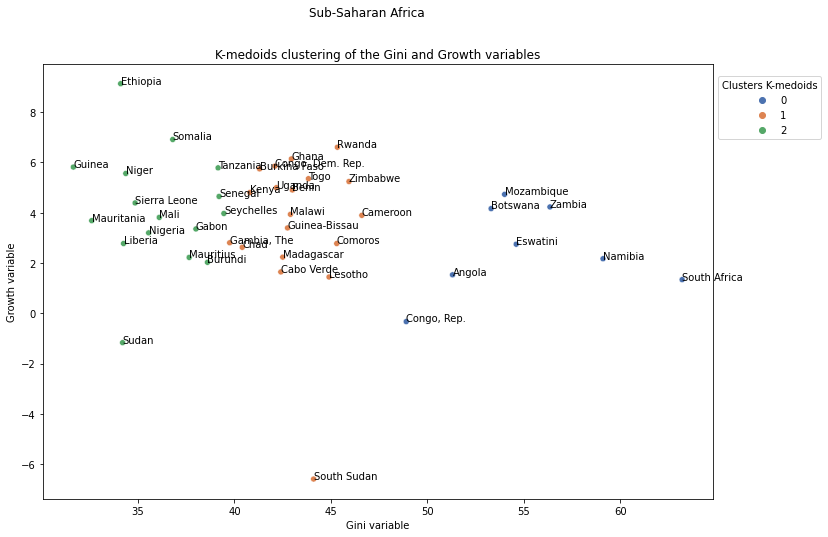

In [118]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_KM', legend = 'full', palette="deep", data = df_Gini_Growth_SSA)
plt.title('K-medoids clustering of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_SSA.Gini_Var, df_Gini_Growth_SSA.Growth_Var, df_Gini_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters K-medoids', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [119]:
Cluster_Growth = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_KM']).Growth_Var.mean())
Cluster_Gini = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_KM']).Gini_Var.mean())
dt_SSA_km_Growth_Gini = pd.concat([Cluster_Growth, Cluster_Gini], axis = 1)
dt_SSA_km_Growth_Gini

,Growth_Var,Gini_Var
ClusterID_KM,,
0,2.569877,55.093750
1,3.565207,43.106140
2,4.128541,36.032292


### AGNES algorithm

In [120]:
df_Gini_Growth_SSA_A = df_Gini_Growth_SSA[['Growth_Var', 'Gini_Var']]

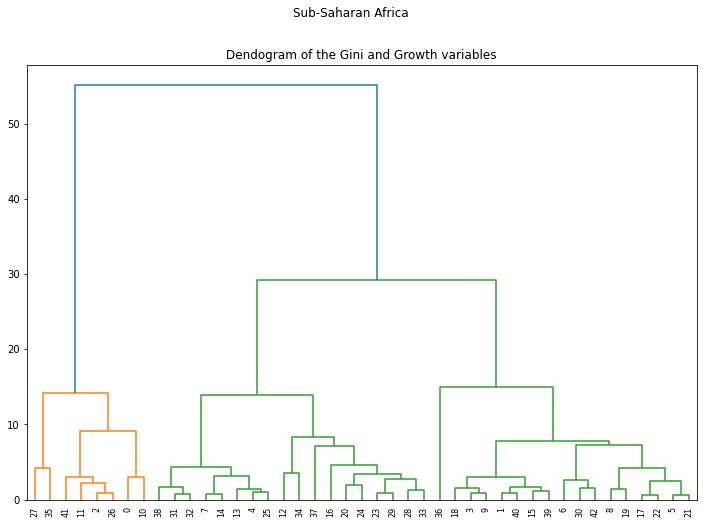

In [121]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
dend = shc.dendrogram(shc.linkage(df_Gini_Growth_SSA_A, method = 'ward'))

In [122]:
sse_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gini_Growth_SSA_A)
    silhouette_average = silhouette_score(df_Gini_Growth_SSA_A, cluster_labels)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.5935536824699698],
 [3, 0.4428058460578558],
 [4, 0.4479444273186294],
 [5, 0.4353506226076192],
 [6, 0.365433677051213],
 [7, 0.3644000870135791],
 [8, 0.36442674641408657],
 [9, 0.3327519199619736]]

In [123]:
DB_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gini_Growth_SSA_A)
    davies_bouldin = davies_bouldin_score(df_Gini_Growth_SSA_A, cluster_labels)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5247746702397869],
 [3, 0.733989818665306],
 [4, 0.563949928349327],
 [5, 0.5780256113329669],
 [6, 0.6392707233012359],
 [7, 0.5944249336132847],
 [8, 0.6138624282845956],
 [9, 0.7120597058848702]]

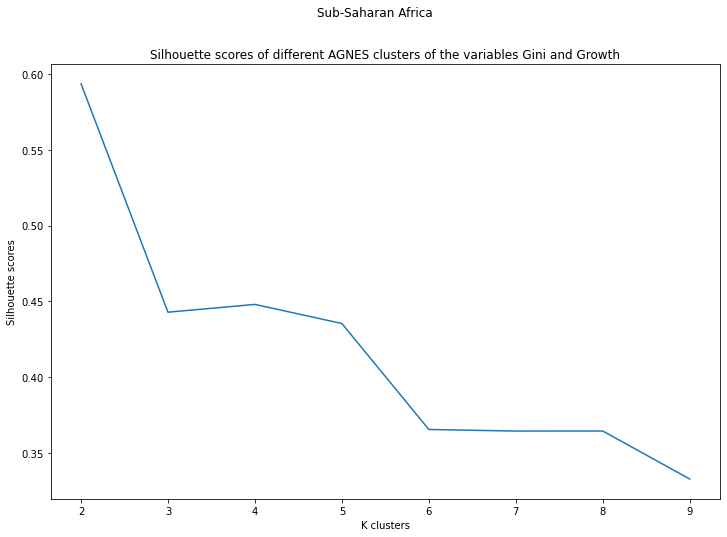

In [124]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different AGNES clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [125]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean' ,linkage = 'ward')
ClusterID_A = cluster.fit_predict(df_Gini_Growth_SSA_A)
ClusterID_A

array([0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 1, 1, 0, 1])

In [126]:
df_Gini_Growth_SSA['ClusterID_A'] = [0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 1, 1, 0, 1]

In [127]:
df_Gini_Growth_SSA['ClusterID_A'].value_counts()

2    18
1    16
0     8
3     1
Name: ClusterID_A, dtype: int64

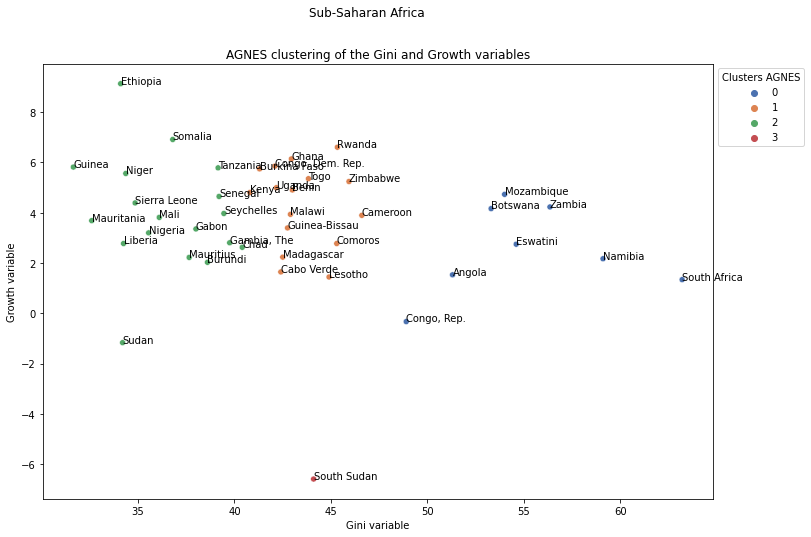

In [128]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_A', legend = 'full', palette="deep", data = df_Gini_Growth_SSA)
plt.title('AGNES clustering of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_SSA.Gini_Var, df_Gini_Growth_SSA.Growth_Var, df_Gini_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters AGNES', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

### DIANA clustering

In [129]:
df_Gini_Growth_SSA_D = df_Gini_Growth_SSA[['Growth_Var', 'Gini_Var']]

In [130]:
from scipy.spatial import distance_matrix

def DIANA(data, n_clusters):
    n_samples = len(data)
    n_features = 2
    similarity_matrix = distance_matrix(data.values, data.values) # similarity matrix of the data
    clusters = [list(range(n_samples))]      # list of clusters, initially the whole dataset is a single cluster
    while True:
        c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
        max_cluster_dia = np.argmax(c_diameters)  #maximum cluster diameter
        max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
        splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
        last_clusters = clusters[max_cluster_dia]
        del last_clusters[max_difference_index]
        while True:
            split = False
            for j in range(len(last_clusters))[::-1]:
                splinter_distances = similarity_matrix[last_clusters[j], splinters]
                last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
                if np.mean(splinter_distances) <= np.mean(last_distances):
                    splinters.append(last_clusters[j])
                    del last_clusters[j]
                    split = True
                    break
            if split == False:
                break
        del clusters[max_cluster_dia]
        clusters.append(splinters)
        clusters.append(last_clusters)
        if len(clusters) == n_clusters:
            break

    cluster_labels = np.zeros(n_samples)
    for i in range(len(clusters)):
        cluster_labels[clusters[i]] = i

    return cluster_labels

In [131]:
sse_ = []
for k in range (2,10):
    clustering = DIANA(df_Gini_Growth_SSA_D, k)
    silhouette_average = silhouette_score(df_Gini_Growth_SSA_D, clustering)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.5935536824699698],
 [3, 0.509138702528646],
 [4, 0.4718880581067737],
 [5, 0.45215356191028544],
 [6, 0.4035152899726095],
 [7, 0.3878210444519068],
 [8, 0.3537994866989005],
 [9, 0.31528289097599904]]

In [132]:
DB_ = []
for k in range (2,10):
    clustering = DIANA(df_Gini_Growth_SSA_D, k)
    davies_bouldin = davies_bouldin_score(df_Gini_Growth_SSA_D, clustering)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5247746702397869],
 [3, 0.4527109453406522],
 [4, 0.5469028607933074],
 [5, 0.5639614520513476],
 [6, 0.5392700199799051],
 [7, 0.5102340625192401],
 [8, 0.5958568475069472],
 [9, 0.6702783529812595]]

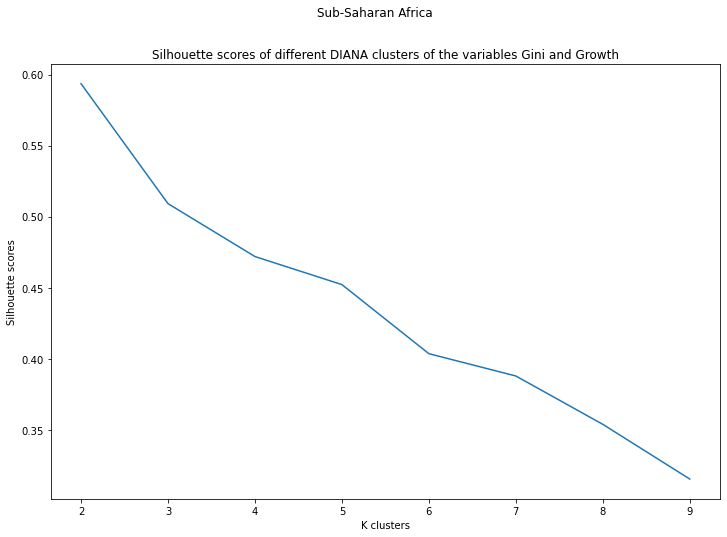

In [133]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different DIANA clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("Sub-Saharan Africa")
plt.show()

In [134]:
DIANA(df_Gini_Growth_SSA_D, 3)

array([0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2.,
       2., 0., 1., 2., 2., 2., 2., 0., 2.])

In [135]:
df_Gini_Growth_SSA['ClusterID_D'] = [round(float(i)) for i in [0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2.,
       2., 0., 1., 2., 2., 2., 2., 0., 2.]]

In [136]:
df_Gini_Growth_SSA['ClusterID_D'].value_counts()

2    34
0     8
1     1
Name: ClusterID_D, dtype: int64

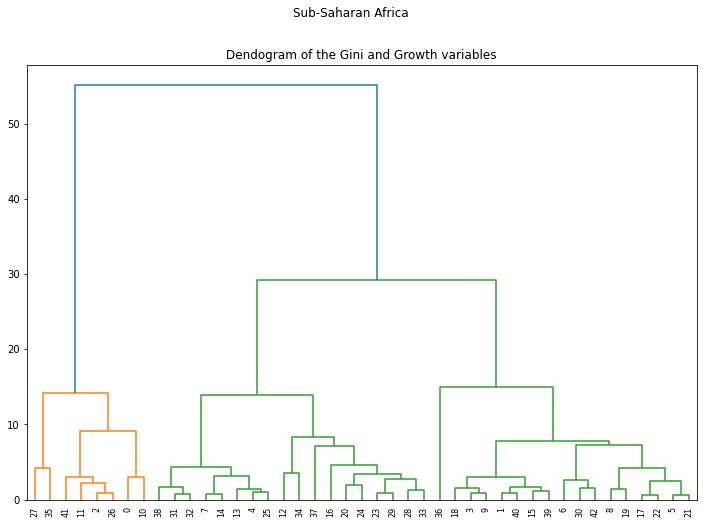

In [137]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
dend = shc.dendrogram(shc.linkage(df_Gini_Growth_SSA_D, method = 'ward'))

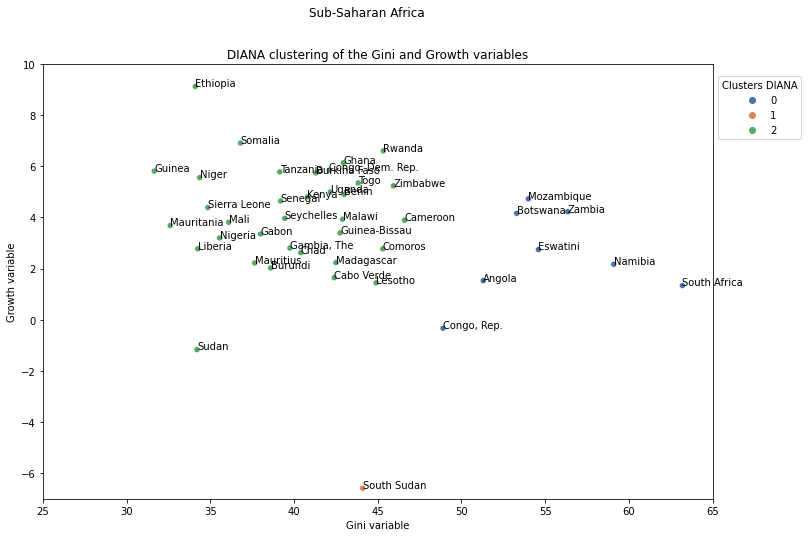

In [138]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_D', legend = 'full', palette="deep", data = df_Gini_Growth_SSA)
plt.title('DIANA clustering of the Gini and Growth variables')
plt.suptitle("Sub-Saharan Africa")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
plt.xlim([25,65])
plt.ylim([-7,10])
label_point(df_Gini_Growth_SSA.Gini_Var, df_Gini_Growth_SSA.Growth_Var, df_Gini_Growth_SSA.Country, plt.gca()) 
plt.legend(title='Clusters DIANA', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [139]:
Cluster_Growth = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_D']).Growth_Var.mean())
Cluster_Gini = pd.DataFrame(df_Gini_Growth_SSA.groupby(['ClusterID_D']).Gini_Var.mean())
dt_SSA_D_Growth_Gini = pd.concat([Cluster_Growth, Cluster_Gini], axis = 1)
dt_SSA_D_Growth_Gini

,Growth_Var,Gini_Var
ClusterID_D,,
0,2.569877,55.093750
1,-6.586501,44.100000
2,4.128885,39.748039
